<h1><center><b>Breast Cancer Project</b></center></h1>
<div><center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR5-oYqtTFUv6OFrgiNtAZ1JfsI1miWM7aRYkJZ5PFC2IsgaS71"></center></div>
<div>Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control.Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.It’s important to understand that most breast lumps are benign and not cancer (malignant). </div>
<div>So, Today we are going to do an experiment with a dataset and perdict that the person is suffering from malignant or benign with some algorithmns </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
cancer =pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/Untitled Folder/data.csv")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
cancer.isnull().sum().sum()

569

In [6]:
cancer = cancer.drop(['Unnamed: 32','id'],axis=1)

In [7]:
cancer.isnull().sum().sum()

0

In [8]:
Lb = LabelEncoder()

In [9]:
cancer['diagnosis'] = Lb.fit_transform(cancer['diagnosis'])

In [10]:
corr = cancer.corr()

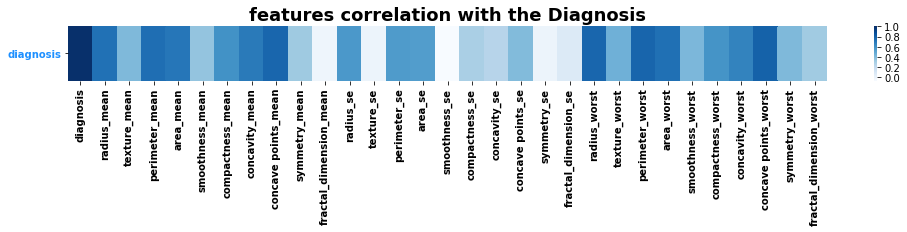

In [11]:
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(corr.sort_values(by=['diagnosis'],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Diagnosis", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [12]:
realtion = corr['diagnosis'].head(31).to_frame()
cm = sns.light_palette("red", as_cmap=True)
realtion.style.background_gradient(cmap=cm)

,diagnosis
diagnosis,1
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.35856
compactness_mean,0.596534
concavity_mean,0.69636
concave points_mean,0.776614
symmetry_mean,0.330499


Text(0, 0.5, 'frequency')

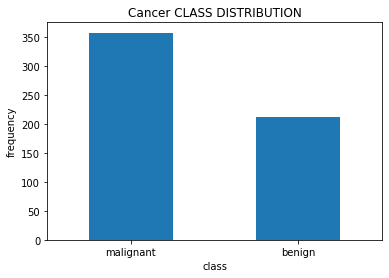

In [13]:
label = ["malignant","benign"]
count_classes = pd.value_counts(cancer['diagnosis'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Cancer CLASS DISTRIBUTION")
plt.xticks(range(2), labels=label)
plt.xlabel("class")
plt.ylabel("frequency")

In [14]:
X  = cancer.drop('diagnosis',axis=1)
y = cancer['diagnosis']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=40)

In [17]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
L = LogisticRegression()
SGD = SGDClassifier()
GNB = GaussianNB()
KN = KNeighborsClassifier()
RF = RandomForestClassifier(n_estimators=10)

In [19]:
L = L.fit(X_train,y_train)
SGD =SGD.fit(X_train,y_train)
GNB = GNB.fit(X_train,y_train)
KN = KN.fit(X_train,y_train)
RF = RF.fit(X_train,y_train)

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [20]:
L.score(X_train,y_train)

0.9547738693467337

In [21]:
print("Logistic regression : ",L.score(X_train,y_train))
print("Stochastic Gradient Descent : ",SGD.score(X_train,y_train))
print("Naive Bayes : ", GNB.score(X_train,y_train))
print("KN : ",KN.score(X_train,y_train))
print("RF : ",RF.score(X_train,y_train))

Logistic regression :  0.9547738693467337
Stochastic Gradient Descent :  0.9020100502512562
Naive Bayes :  0.9396984924623115
KN :  0.9447236180904522
RF :  0.9949748743718593


In [22]:
L.score(X_test,y_test)

0.9590643274853801

In [23]:
y_pred = L.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [25]:
accuracy_score(y_test,y_pred)

0.9590643274853801

In [26]:
confusion_matrix(y_test,y_pred)

array([[112,   3],
       [  4,  52]])

In [27]:
precision_score(y_test,y_pred)

0.9454545454545454

In [28]:
recall_score(y_test,y_pred)

0.9285714285714286

In [29]:
f1_score(y_test,y_pred)

0.9369369369369368

In [30]:
df = pd.DataFrame({'Predicted':y_pred,"Actual":y_test})

In [31]:
df

,Predicted,Actual
295,0,0
16,1,1
431,0,0
453,0,0
15,1,1
...,...,...
333,0,0
467,0,0
444,1,1
414,1,1


In [32]:
corr = df.corr()

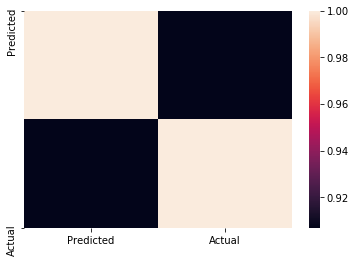

In [33]:
sns.heatmap(corr)